In [1]:

import pandas as pd
df=pd.read_csv("/content/Synthetic_Loan_Default_Dataset.csv")
print(df.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  LN00000001   59   46927       93462          681             256   
1  LN00000002   49  136619       21763          670             300   
2  LN00000003   35   27684      123242          320              25   
3  LN00000004   63  195558      113863          328             339   
4  LN00000005   28   60172       91297          769              29   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ... FamilySize  \
0              10         13.59        48      0.30  ...          5   
1               7         20.71        24      0.24  ...          8   
2              12         21.03        12      0.82  ...          6   
3               8          3.54        60      0.81  ...          9   
4              10         13.30        60      0.63  ...          8   

  DependentsCount PropertyType EmployerIndustry VehicleOwned  \
0               1    Apartment       Healthcare           No   
1               2 

In [2]:
df.shape

(1000000, 40)

In [3]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'ResidenceType', 'BankAccountType', 'PrevDefaults', 'MissedPayments',
       'LoanApplicationChannel', 'Region', 'MobileVerified', 'EmailVerified',
       'AccountAgeMonths', 'IsGovernmentEmployee', 'HasCreditCard',
       'CreditCardLimit', 'CreditUtilization', 'FamilySize', 'DependentsCount',
       'PropertyType', 'EmployerIndustry', 'VehicleOwned',
       'HomeOwnershipDuration', 'CurrentDelinquencies', 'TotalAccounts',
       'RiskScore', 'Default'],
      dtype='object')

In [4]:
df.EmploymentType.unique()

array(['Part-time', 'Full-time', 'Unemployed', 'Self-employed'],
      dtype=object)

In [5]:
!python --version

!pip install imbalanced-learn


Python 3.11.13


In [6]:
df['Default'].value_counts(normalize=True)

,proportion
Default,
0,0.917633
1,0.082367


In [7]:
X= df.drop(columns=['Default'])
Y= df['Default']


In [8]:
from imblearn.over_sampling import SMOTE

# Use only numeric features (from your earlier list)
selected_features = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
     'InterestRate', 'LoanTerm', 'DTIRatio'
]

X = df[selected_features]
y = df['Default']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"✅ After SMOTE: {X_resampled.shape}, Class balance: {y_resampled.value_counts().to_dict()}")


✅ After SMOTE: (1835266, 8), Class balance: {1: 917633, 0: 917633}


In [9]:
# Step 3: Combine resampled features and target variable into a new DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df["Default"] = y_resampled

resampled_df.to_csv('Processed_data.csv', index=False)

resampled_df.head()

resampled_df['Default'].value_counts(normalize=True)

,proportion
Default,
1,0.5
0,0.5


In [10]:
"""# **Feature Reduction**"""

X = resampled_df[['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed','InterestRate','DTIRatio','LoanTerm']]
Y= resampled_df['Default']

X.shape,Y.shape

((1835266, 8), (1835266,))

In [11]:
# Step 3: Combine resampled features and target variable into a new DataFrame
final_df = pd.DataFrame(X, columns=X.columns)
final_df["Default"] = Y

final_df.head()

final_df.shape

final_df.to_csv('Selected_features.csv', index=False)


In [12]:
df.shape

(1000000, 40)

In [13]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [14]:
"""# TrainTest Split"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7,stratify = Y)

X_train.head()

X_train.isnull().sum()


,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
InterestRate,0
DTIRatio,0
LoanTerm,0


In [15]:
"""# **Getting Feature importance**

# APPLY DECISION TREE
"""

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 7)
dt.fit(X_train,y_train)

# importance of all features
sorted(zip(dt.feature_importances_,X_train.columns),reverse = True)

# 2) mean importance take col > mean import
mean_imp = sum(dt.feature_importances_)/len(dt.feature_importances_)
X_train.columns[dt.feature_importances_ > mean_imp ]

# 3) Select top 5
sorted(zip(dt.feature_importances_,X_train.columns),reverse = True)[:5]

[(np.float64(0.4198415667020342), 'LoanTerm'),
 (np.float64(0.21036025448372597), 'Income'),
 (np.float64(0.13796906429919234), 'DTIRatio'),
 (np.float64(0.10079431364766654), 'LoanAmount'),
 (np.float64(0.03736492438029109), 'InterestRate')]

In [16]:
"""# APPLY RFE"""

from sklearn.feature_selection import RFE

rfe = RFE(dt)
rfe.fit(X_train,y_train)

for imp,col in sorted(zip(rfe.ranking_,X_train.columns)):
    print(f"{col} = {imp}")

#2) important column rank = 1

print("Column Count = ",len(X_train.columns[rfe.ranking_ == 1  ]))
X_train.columns[rfe.ranking_ == 1 ]

DTIRatio = 1
Income = 1
LoanAmount = 1
LoanTerm = 1
InterestRate = 2
CreditScore = 3
MonthsEmployed = 4
Age = 5
Column Count =  4


Index(['Income', 'LoanAmount', 'DTIRatio', 'LoanTerm'], dtype='object')

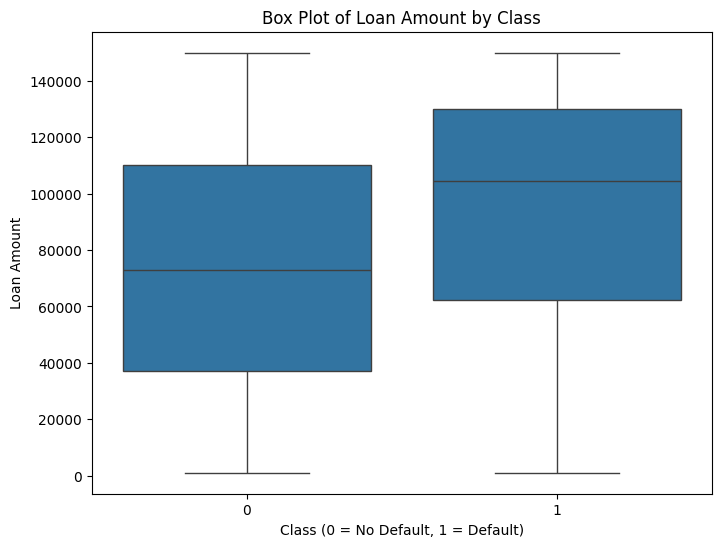

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000  0.003765   -0.005986     0.004335       -0.000956   
Income          0.003765  1.000000   -0.221256     0.042795        0.002847   
LoanAmount     -0.005986 -0.221256    1.000000    -0.029612       -0.005025   
CreditScore     0.004335  0.042795   -0.029612     1.000000       -0.001075   
MonthsEmployed -0.000956  0.002847   -0.005025    -0.001075        1.000000   
InterestRate    0.000771  0.000983   -0.001374     0.000316       -0.001077   
LoanTerm       -0.000658  0.002110   -0.003303    -0.000417       -0.000722   
DTIRatio       -0.000760 -0.041351    0.027351    -0.007179       -0.000645   
Default        -0.015746 -0.306916    0.229759    -0.047776       -0.000351   

                InterestRate  LoanTerm  DTIRatio   Default  
Age                 0.000771 -0.000658 -0.000760 -0.015746  
Income              0.000983  0.002110 -0.041351 -0.306916  
LoanAmount         -0.0013

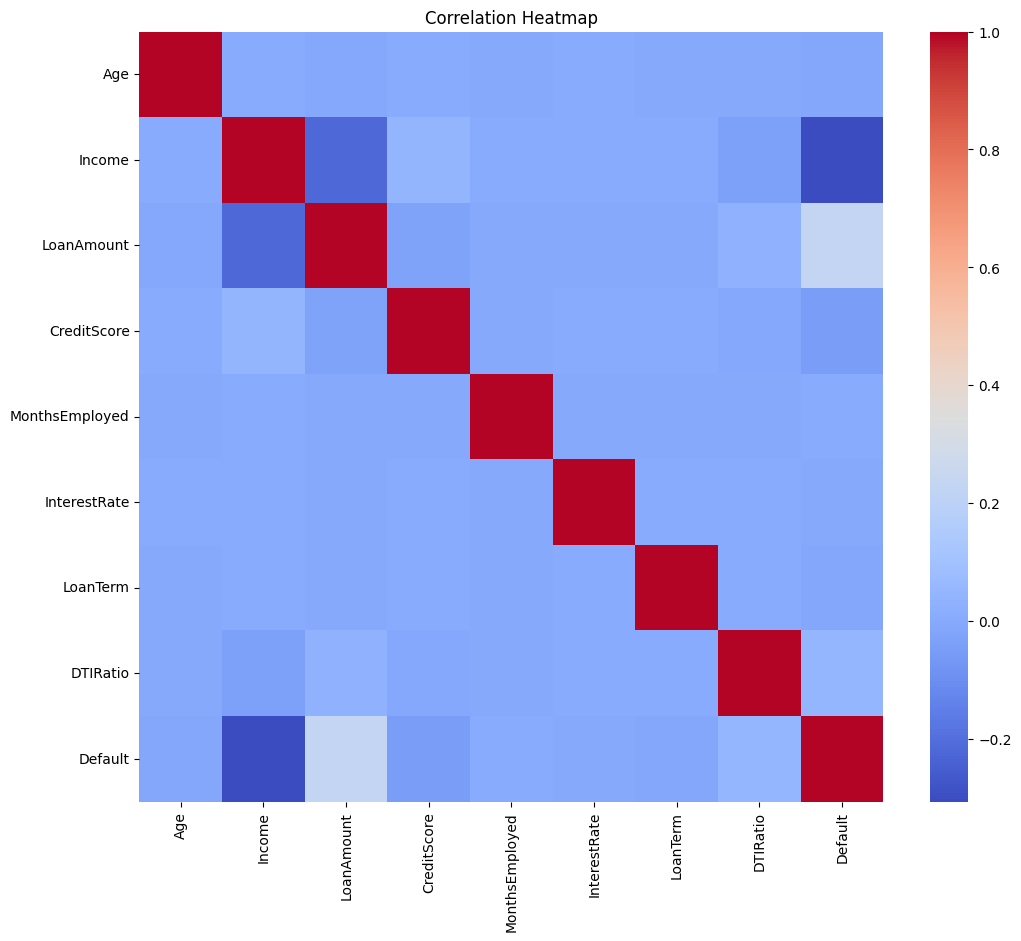

((1284686, 8), (550580, 8), (1284686,), (550580,))

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The error was caused because the original `df` still contained
# non-numeric columns. Using the one-hot encoded dataframe `X_encoded`
# which contains only numeric data.
X_for_corr = resampled_df.copy()
# X_for_corr['Default'] = y_resampled # This line is not needed as resampled_df already has the 'Default' column


plt.figure(figsize=(8, 6))
sns.boxplot(x=X_for_corr["Default"], y=X_for_corr["LoanAmount"])
plt.title("Box Plot of Loan Amount by Class")
plt.xlabel("Class (0 = No Default, 1 = Default)")
plt.ylabel("Loan Amount")
plt.show()

"""# Correlation"""

# Compute correlation matrix
correlation_matrix = X_for_corr.corr()

# Print correlation matrix
print(correlation_matrix)

"""# HeatMap"""

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

X = X_resampled
Y= y_resampled

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

In [19]:
#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("Spark SQL basic example").enableHiveSupport().getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext

file_path ="/content/Synthetic_Loan_Default_Dataset.csv"

# Create an DataFrame from file_path
df = spark.read.csv(file_path,header=True,inferSchema=True)

# Check the type of people_df
#print("The type of people_df is", type(people_df))

from pyspark.sql.functions import col
# Get the total count of records
total_count = df.count()

# Get the count of each class (0 and 1)
class_counts = df.groupBy("Default").count()

# Calculate the proportion of each class
class_proportions = class_counts.withColumn("proportion", col("count") / total_count)

# Show the result
class_proportions.show()

+-------+------+----------+
|Default| count|proportion|
+-------+------+----------+
|      1| 82367|  0.082367|
|      0|917633|  0.917633|
+-------+------+----------+



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score

# Use balanced class weights to improve recall on minority class
logreg = LogisticRegression(class_weight='balanced', random_state=7, max_iter=1000)

# Fit the model
logreg.fit(X_train, Y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)


print(f"✅ Accuracy: {accuracy:.4f}")
print(f"🔁 Recall: {recall:.4f}")






✅ Accuracy: 0.6359
🔁 Recall: 0.6212

📊 Confusion Matrix:


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=7, n_jobs=-1)
rf.fit(X_train, Y_train)

y_pred_rf = rf.predict(X_test)

print("🌲 Random Forest")
print(f"✅ Accuracy: {accuracy_score(Y_test, y_pred_rf):.4f}")
print(f"🔁 Recall: {recall_score(Y_test, y_pred_rf):.4f}")
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))


🌲 Random Forest
✅ Accuracy: 0.9250
🔁 Recall: 0.8666
[[270871   4625]
 [ 36689 238395]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    275496
           1       0.98      0.87      0.92    275084

    accuracy                           0.92    550580
   macro avg       0.93      0.92      0.92    550580
weighted avg       0.93      0.92      0.92    550580



In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=Y_train.value_counts()[0] / Y_train.value_counts()[1],
                     eval_metric='logloss', random_state=7)
xgb.fit(X_train, Y_train)

y_pred_xgb = xgb.predict(X_test)

print("\n⚡ XGBoost")
print(f"✅ Accuracy: {accuracy_score(Y_test, y_pred_xgb):.4f}")
print(f"🔁 Recall: {recall_score(Y_test, y_pred_xgb):.4f}")
print(confusion_matrix(Y_test, y_pred_xgb))
print(classification_report(Y_test, y_pred_xgb))



⚡ XGBoost
✅ Accuracy: 0.9324
🔁 Recall: 0.8773
[[272010   3486]
 [ 33752 241332]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    275496
           1       0.99      0.88      0.93    275084

    accuracy                           0.93    550580
   macro avg       0.94      0.93      0.93    550580
weighted avg       0.94      0.93      0.93    550580



In [25]:
# Install CatBoost (only needed in notebooks)
%pip install catboost

# Import CatBoostClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score


#Only keep required features
selected_features = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
     'InterestRate', 'LoanTerm', 'DTIRatio'
]

# Use the resampled_df DataFrame for train-test split
X = resampled_df[selected_features]
y = resampled_df['Default']

# ✅ Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# ✅ Train CatBoost with selected features
cat = CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=7)
cat.fit(X_train, Y_train)

# ✅ Predict
y_pred_cat = cat.predict(X_test)

# ✅ Evaluation
print("\n🐱 CatBoost")
print(f"✅ Accuracy: {accuracy_score(Y_test, y_pred_cat):.4f}")
print(f"🔁 Recall: {recall_score(Y_test, y_pred_cat):.4f}")
print(confusion_matrix(Y_test, y_pred_cat))
print(classification_report(Y_test, y_pred_cat))


🐱 CatBoost
✅ Accuracy: 0.9643
🔁 Recall: 0.9350
[[182851   1207]
 [ 11890 171106]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    184058
           1       0.99      0.94      0.96    182996

    accuracy                           0.96    367054
   macro avg       0.97      0.96      0.96    367054
weighted avg       0.97      0.96      0.96    367054



In [28]:
import joblib

# Save the best model
joblib.dump(cat, "best_Catboost_model.pkl")
print("✅ CatBoost model saved as best_CatBoost_model.pkl")


✅ CatBoost model saved as best_CatBoost_model.pkl


In [29]:
!pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Set Streamlit page configuration
st.set_page_config(page_title="Loan Risk Predictor", page_icon="🏦")

# Load trained XGBoost model
model = joblib.load("best_CatBoost_model.pkl")  # Replace with your actual model path

# App title
st.title("🏦 Loan Default Risk Predictor")
st.markdown("Use this tool to assess the risk of default before approving a loan.")

# Input form
st.markdown("### 📋 Enter Applicant Details")

age = st.slider("Age", 18, 75, 30)
income = st.number_input("Monthly Income (₹)", min_value=0, value=30000)
loan_amount = st.number_input("Loan Amount (₹)", min_value=1000, value=100000)
credit_score = st.slider("Credit Score", 300, 850, 650)
months_employed = st.slider("Months Employed", 0, 600, 36)
interest_rate = st.slider("Interest Rate (%)", 0.0, 30.0, 12.0)
loan_term = st.selectbox("Loan Term (months)", [12, 24, 36, 48, 60])
dti_ratio = st.slider("DTI Ratio (%)", 0.0, 100.0, 35.0)

# Prediction trigger
if st.button("Check Loan Risk"):
    # Create input DataFrame
    input_data = pd.DataFrame([{
        'Age': age,
        'Income': income,
        'LoanAmount': loan_amount,
        'CreditScore': credit_score,
        'MonthsEmployed': months_employed,
        'InterestRate': interest_rate,
        'LoanTerm': loan_term,
        'DTIRatio': dti_ratio
    }])

    # Get prediction probability
    prob = model.predict_proba(input_data)[0][1]

    # Custom threshold
    threshold = 0.35
    prediction = 1 if prob >= threshold else 0

    # Result output
    st.markdown("### 🔍 Prediction Result")
    if prediction == 1:
        st.error(f"🚫 **Risky**: {prob:.2%} chance of default. Loan should be avoided.")
    else:
        st.success(f"✅ **Safe**: Only {prob:.2%} chance of default. Loan may be granted.")

    # Model output
    st.markdown("### 📊 Model Output")
    st.write(f"Prediction Class (threshold @ {threshold:.2f}): `{prediction}` (1 = Risky, 0 = Safe)")
    st.write(f"Probability of Default: `{prob:.4f}`")


2025-08-04 04:11:43.012 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


FileNotFoundError: [Errno 2] No such file or directory: 'best_CatBoost_model.pkl'